# Data Cleaning and Preprocessing

*First let's import the neccessary libraries*

In [21]:
#import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data and display the first n rows
df=pd.read_csv('homicide.csv', encoding='unicode escape')
df.head()

uid reported_date  victim_last victim_first victim_race victim_age  \
0  Alb-000001    2010/05/04       GARCIA         JUAN    Hispanic         78   
1  Alb-000002    2010/02/16      MONTOYA      CAMERON    Hispanic         17   
2  Alb-000003    2010/06/01  SATTERFIELD      VIVIANA       White         15   
3  Alb-000004    2010/01/01     MENDIOLA       CARLOS    Hispanic         32   
4  Alb-000005    2010/01/02         MULA       VIVIAN       White         72   

  victim_sex         city state        lat         lon            disposition  
0       Male  Albuquerque    NM  35.095788 -106.538555  Closed without arrest  
1       Male  Albuquerque    NM  35.056810 -106.715321       Closed by arrest  
2     Female  Albuquerque    NM  35.086092 -106.695568  Closed without arrest  
3       Male  Albuquerque    NM  35.078493 -106.556094       Closed by arrest  
4     Female  Albuquerque    NM  35.130357 -106.580986  Closed without arrest

In [3]:
#check the info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            52179 non-null  object 
 1   reported_date  52179 non-null  object 
 2   victim_last    52178 non-null  object 
 3   victim_first   52179 non-null  object 
 4   victim_race    52179 non-null  object 
 5   victim_age     52179 non-null  object 
 6   victim_sex     52179 non-null  object 
 7   city           52179 non-null  object 
 8   state          52179 non-null  object 
 9   lat            52119 non-null  float64
 10  lon            52119 non-null  float64
 11  disposition    52179 non-null  object 
dtypes: float64(2), object(10)
memory usage: 4.8+ MB


In [4]:
#get the number of rows and columns
df.shape

(52179, 12)

In [5]:
#find out if there are any nulls
df.isnull().sum()

uid               0
reported_date     0
victim_last       1
victim_first      0
victim_race       0
victim_age        0
victim_sex        0
city              0
state             0
lat              60
lon              60
disposition       0
dtype: int64

In [6]:
#check the statistics summary of the data
df.describe()

lat           lon
count  52119.000000  52119.000000
mean      37.026786    -91.471094
std        4.348647     13.746378
min       25.725214   -122.507779
25%       33.765203    -95.997198
50%       38.524973    -87.710286
75%       40.027627    -81.755909
max       45.051190    -71.011519

*We see that the states were written in abbreviations, this could be difficult to read for a non US citizen, we will create a dictionary to change the names to properly*

In [7]:
df['state'].unique()

array(['NM', 'GA', 'MD', 'LA', 'AL', 'MA', 'NY', 'NC', 'IL', 'OH', 'TX',
       'CO', 'MI', 'CA', 'IN', 'FL', 'MO', 'NV', 'KY', 'TN', 'wI', 'MN',
       'OK', 'NE', 'PA', 'AZ', 'VA', 'DC'], dtype=object)

In [8]:
#create the dictionary
dict = {'NM': 'New Mexico','GA': 'Georgia','MD': 'Maryland','LA': 'Louisiana',
'AL': 'Alabama','MA': 'Massachusetts','NY': 'New York','NC': 'North Carolina','IL': 'Illinois',
'OH': 'Ohio','TX': 'Texas','CO': 'Colorado','MI': 'Michigan','CA': 'California','IN': 'Indiana',
'FL': 'Florida', 'OK' : 'Oklahoma', 'PA' : 'Pennsylvania', 'NE' : 'Nebraska', 'AZ' : 'Arizona', 
'VA': 'Virginia', 'MO' : 'Missouri', 'DC' : 'District of Columbia', 'NV' : 'Nevada', 'KY' : 'Kentucky',
'TN' : 'Tennessee', 'wI' : 'Wisconsin', 'MN' : 'Minnesota'}

*We will replace the abbreviations to full names, we want this effect to take place in the original dataframe, so we set inplace to True*

In [9]:
#replace the abbreviations to full names
df['state'].replace(dict, inplace=True)

In [10]:
#confirm the effect
df['state'].unique()

array(['New Mexico', 'Georgia', 'Maryland', 'Louisiana', 'Alabama',
       'Massachusetts', 'New York', 'North Carolina', 'Illinois', 'Ohio',
       'Texas', 'Colorado', 'Michigan', 'California', 'Indiana',
       'Florida', 'Missouri', 'Nevada', 'Kentucky', 'Tennessee',
       'Wisconsin', 'Minnesota', 'Oklahoma', 'Nebraska', 'Pennsylvania',
       'Arizona', 'Virginia', 'District of Columbia'], dtype=object)

*We are going to drop the victims first and last name, they are not needed for this analysis*

In [11]:
df.drop(['victim_first', 'victim_last'], axis= 1, inplace=True)

In [12]:
df.columns

Index(['uid', 'reported_date', 'victim_race', 'victim_age', 'victim_sex',
       'city', 'state', 'lat', 'lon', 'disposition'],
      dtype='object')

# Exploratory Data Analysis

**Q1. Which state has the highest number of case?**

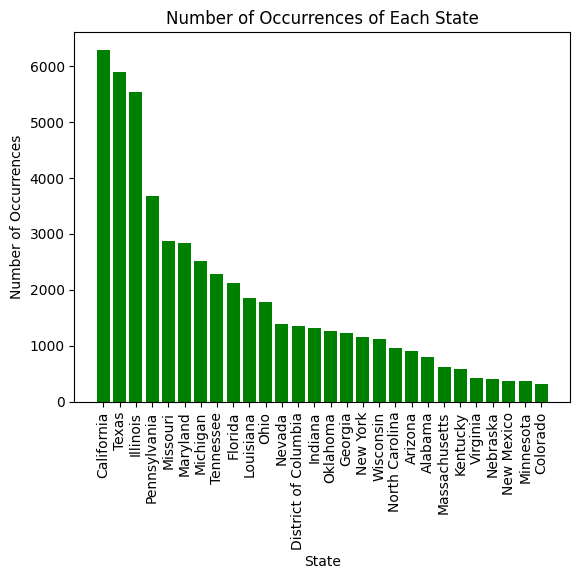

In [13]:

# Get the number of occurrences of each state
n_occurrences = df['state'].value_counts()

# Get bar names
bar_names = n_occurrences.index.astype(str).to_list()

# Get maximum bar name string lengths
max_name_length = 0
for name in bar_names:
  max_name_length = max(max_name_length, len(name))

# Get total number of bars
n_bars = len(bar_names)

# Create a bar chart of the number of occurrences of each state
plt.bar(n_occurrences.index, n_occurrences.values, color= 'green')
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each State')
plt.xticks(rotation=90)
plt.show()



From the chart above, we see that California has the highest number of Homcide cases at over 6000, followed by Texas and Illinois all the way down to Colorado which has less than 1000 cases

**Q2. What is the distribution of disposition status?**

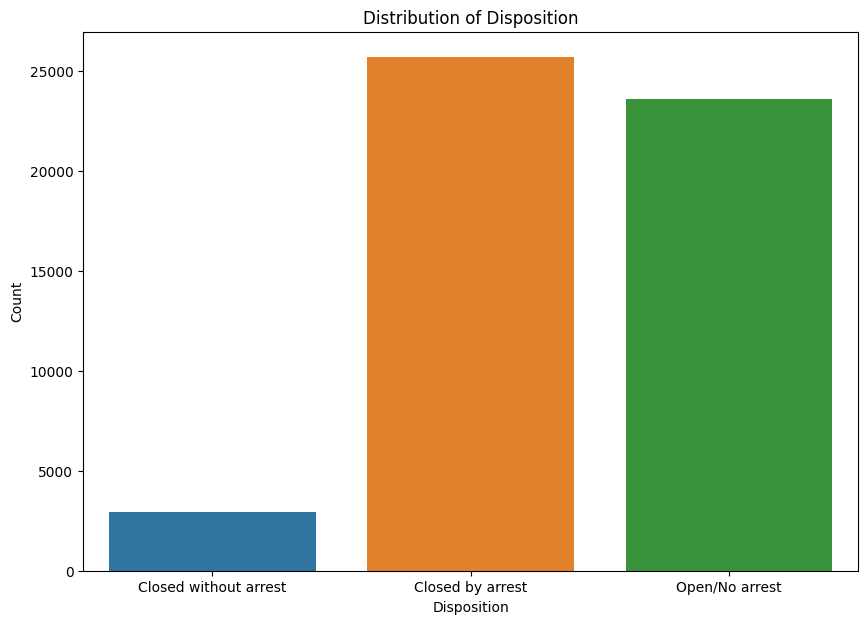

In [14]:
# Create a bar chart of the distribution of disposition of total cases
plt.figure(figsize=(10, 7))
sns.countplot(x='disposition', data=df)
plt.title("Distribution of Disposition")
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

Although it may look like there a lots of cases have been closed with arrests made, it should also be noted that an almost equivalent number of cases were still open with no arrest made yet.

**Q3. Highest homicide rates by race**

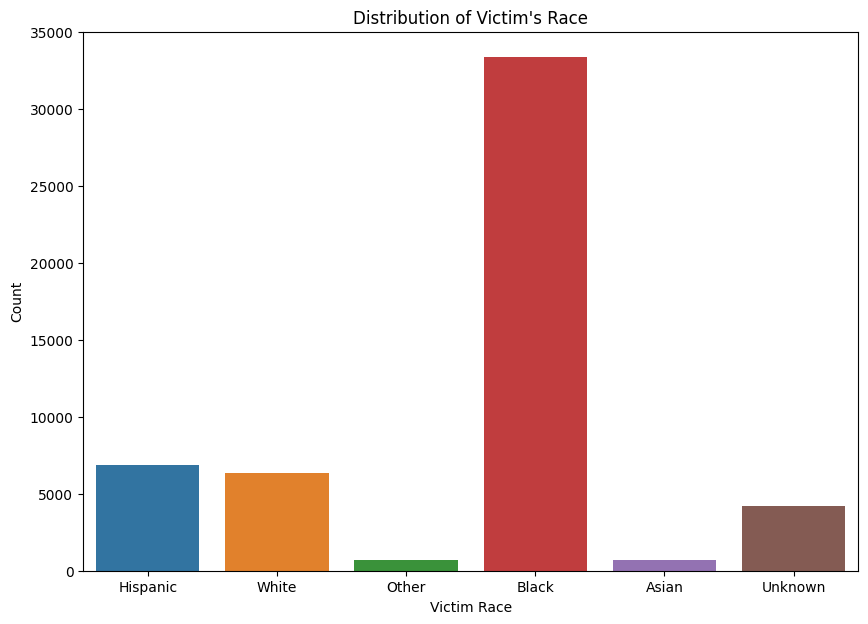

In [15]:
# Create a bar chart of the distribution of victims race
plt.figure(figsize=(10, 7))
sns.countplot(x='victim_race', data=df)
plt.title("Distribution of Victim's Race")
plt.xlabel('Victim Race')
plt.ylabel('Count')
plt.show()

An very high number of homicide victims were black, this number is quite alarming. It could be seen that almost 35,000 victims were of black descendents 

**Q4. Highest homicide rates by gender**

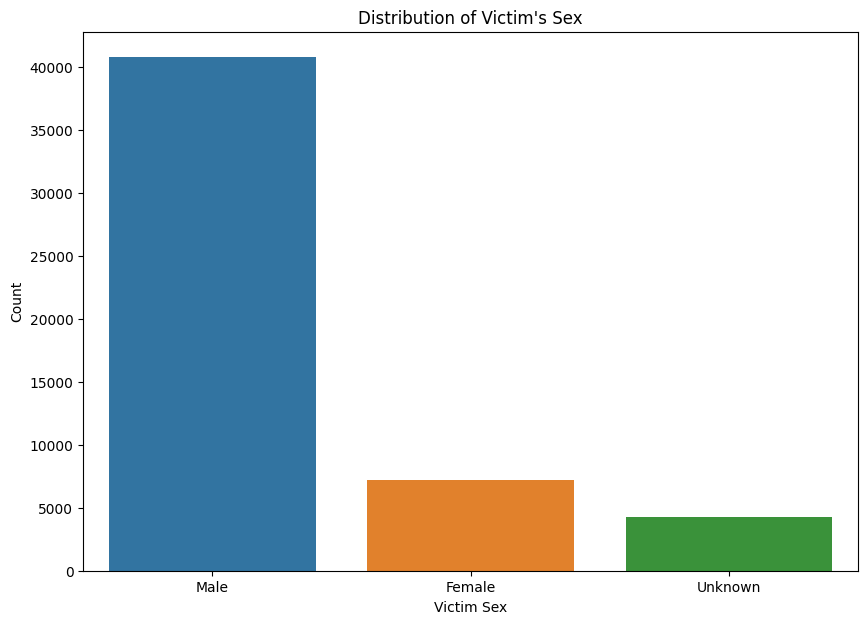

In [16]:
# Create a bar chart of the distribution of victims sex
plt.figure(figsize=(10, 7))
sns.countplot(x='victim_sex', data=df)
plt.title("Distribution of Victim's Sex")
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()

Homicides rate is higher in males compared to females

**Q5. What age range or age group has the highest number of homicide victims**

In [17]:
# convert the victim's age to numeric, in order to get a distribution
df['victim_age'] = pd.to_numeric(df['victim_age'], errors='coerce')

Text(0.5, 1.0, 'Age Distribution')

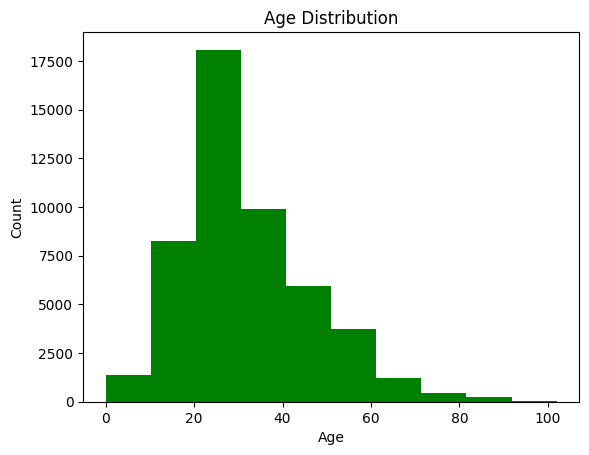

In [18]:
#import the needed library
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

#plot the histogram chart using bins of 10 to display age distribution
plt.pyplot.hist(df['victim_age'], bins=10, color='green')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Age Distribution')

We can see that most victims are young to middle-aged. Looks more like people in their 30s are a target.

**Q6. Which year has the highest reported case?**

*In order to plot the year, we must first convert the year data type from its current data type to date format and then extract the year from the reported dates*

In [19]:
# convert the date column to datetime data type 
df['reported_date'] = pd.to_datetime(df['reported_date'])

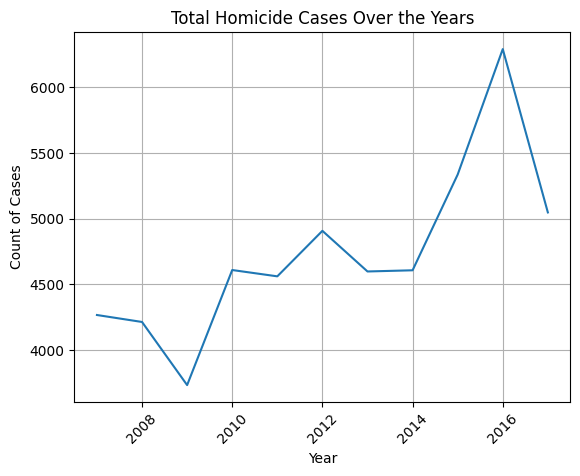

In [22]:
# Extract the year from 'reported_date'
df['reported_year'] = df['reported_date'].dt.year

# Group the data by year and count the number of cases for each year
yearly_counts = df['reported_year'].value_counts().sort_index()

# Create a line graph
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Count of Cases')
plt.title('Total Homicide Cases Over the Years')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid lines
plt.show()

The year 2016, 2015 and 2017 respectively has the highest number of reports. Overall, there have been constant reports over the years.

*Now let's display a map of all the cities in the dataset, but first we will drop the rows with null values in latitude and longitude*

In [23]:
# drop the rows with null values in latitude and longitude
df.dropna(subset=['lat', 'lon'], axis=0, inplace=True)

# check for nulls
df['lat'].isnull().sum()

0

In [24]:
# import the needed library
import plotly.express as px

# set the map parameters
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    hover_name="city",
    hover_data=["uid"],
    zoom=6
)

# Customize the map layout
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=6,
    mapbox_center={"lat": 35.0, "lon": -106.0}
)

# Display the map
fig.show()


# Data Quality Issue(s)

Some rows had to be dropped due to missing data, and information on some victims was not provided and marked as unknown to avoid assumptions. This highlights potential data quality issues that need addressing.

# Recommendations


1. Address data quality issues to ensure more accurate and comprehensive reporting. This includes reducing missing information and standardizing data collection processes.

2.Given the significant number of Black victims, consider targeted interventions and community engagement initiatives in areas with higher homicide rates to address root causes and reduce disparities.

3. Develop outreach programs and support systems for young adults, especially those in their 30s, to help reduce their vulnerability to homicides.

4. Continue efforts to close open cases and make arrests. Implement proactive policing strategies to deter potential offenders.

5. Given the fluctuation in reporting over the years, establish yearly monitoring and analysis to identify trends and allocate resources effectively.

6. Collaborate with communities and local organizations to build trust and encourage reporting, which can help in solving cases more efficiently.

7. Provide training to law enforcement agencies to address any biases and ensure fair treatment in homicide cases.

8. Strengthen victim support services to assist families affected by homicides and provide them with the necessary resources and counseling.

*These recommendations aim to improve data reliability, address disparities, enhance community safety, and ensure a more effective response to homicide cases.*